In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM
import numpy as np

savepath = '../../../data-12/' #This needs to change based on step number!

# Predicting using random weights

### Determine parameters over which to do cross-validation

In [2]:
# datapath = '../../../data-00/'
# keyword = {'DNNActvtn','ROIpred'}
# layer =  {'conv_1','conv_5','fc_3'}
# Sub = [1,2,3,4]
# ROI = {'EVC','ObjectROI'}
# Keepncomps = list(range(2,42,2))

pretrained_val = True
# RandomWs = True

Ypredict = 'Word2Sense' #Word2Vec or Word2Sense

In [3]:
import runCV

In [ ]:
# runCV.runCV_execute(pretrained_val,savepath,Ypredict, RandomWs= False)
runCV.runCV_execute(pretrained_val,savepath,Ypredict, layer={'conv_1'},RandomWs= True)

loading ../../../data-00/things_conv_1
loaded ../../../data-00/things_conv_1
making random cov matrix


In [5]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

datapath = '../../../data-12/'
figurepath = '../../../figures-12/'

# pretrained_vec = [True, False]


In [15]:
myDict_median,myDict_max,myDict_count,myDict_mean = runCV.buildDict(datapath,figurepath,layer={'fc_3'})



In [7]:
len(myDict_count['Metric'])

20

In [9]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [10]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

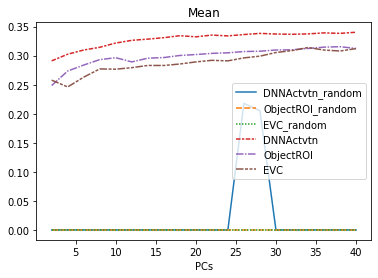

In [11]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:6]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

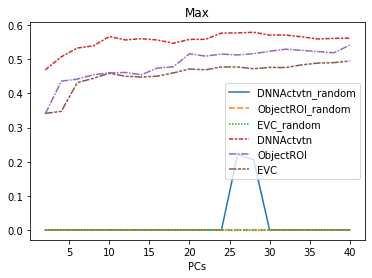

In [12]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:6]).set_title('Max')
plt.savefig(figurepath + "Max.png")

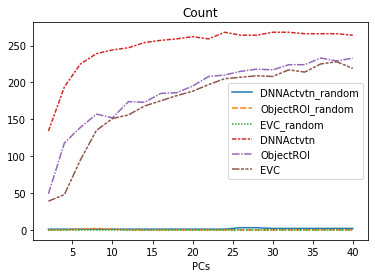

In [13]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:6]).set_title('Count')
plt.savefig(figurepath + "Count.png")

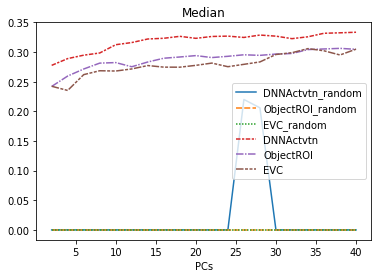

In [14]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:6]).set_title('Median')
plt.savefig(figurepath + "Median.png")